## Import Libraries

In [1]:
import numpy as np            # manejo arreglos
import pandas as pd           # manipulación dataframes      
import matplotlib.pyplot as plt    # Realiza graficas
import pytz                        # manipulación de zonas horarias                     
from datetime import datetime, date, timedelta  # manipulacion de fechas y horas

## Read CSV File

In [2]:
#  Cargar los datos del archivo CSV
data = pd.read_csv('../Data/Raw/DatosSFV1-2023-2.csv', sep=';')

# Crear un dataframe con los datos
df = pd.DataFrame(data)

# Extraer los últimos 5 caracteres de la columna 'Fecha y hora'
df['Hora'] = df['Fecha y hora'].str.slice(-5)

# Extraer los primeros 10 caracteres de la columna 'Fecha y hora'
df['Fecha'] = df['Fecha y hora'].str.slice(0, 10)

# borrar la columna 'Fecha y hora'
df.drop(['Fecha y hora'], axis=1, inplace=True)

print(df.shape)
# df.head(5)  # muestra los 5 primeros registros del dataframe

# Mostrar los nombres de las columnas
for column in df.columns:
    print(column)


(52994, 10)
Energía | FRONIUS Symo 15.0-3 208 (1)
Energía MPP1 | FRONIUS Symo 15.0-3 208 (1)
Energía MPP2 | FRONIUS Symo 15.0-3 208 (1)
Potencia aparente | FRONIUS Symo 15.0-3 208 (1)
Potencia reactiva | FRONIUS Symo 15.0-3 208 (1)
Energía suministrada a la red
Producción fotovoltaica
Unnamed: 8
Hora
Fecha


## Group df for day


In [7]:
# Buscar en la columna "Fecha" las filas con el valor "15.03.2023"
row_day = df.loc[df['Fecha'] == '01.07.2023']
# print(row_day)
print(row_day.shape)
# Encontrar el valor máximo de 'Producción fotovoltaica'
max_value = row_day['Producción fotovoltaica'].max()
# print("max_value: ", max_value)
# Encontrar el tiempo en el que se presentó el valor máximo de 'GHI'
time_max_ghi = df.loc[df['Producción fotovoltaica'] == max_value]
# print(time_max_value["Time"])
print("max_value: ", max_value, "& time_max_ghi: ", time_max_ghi["Hora"].values[0])

# Guardar el dataframe en un archivo CSV
row_day.to_csv('../Data/Processed/SFV_01-07-2023.csv', index=False)


(288, 10)
max_value:  1246,00    & time_max_ghi:  12:20


## Graphs of single-day 

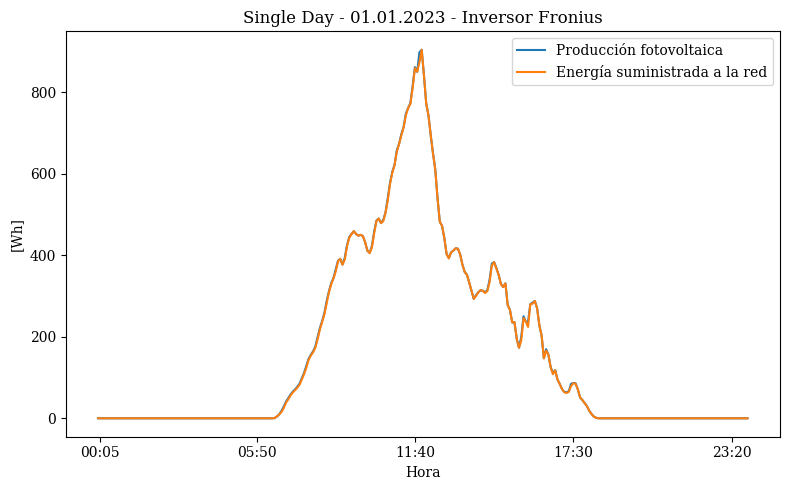

In [4]:
plt.figure(figsize=(8,5))                   # cre figura nueva y configura tamaño
plt.rcParams['font.family'] = 'serif'       # Tipo de letra
plt.title('Single Day - 01.01.2023 - Inversor Fronius') # titulo
plt.plot(row_day['Hora'], row_day['Producción fotovoltaica'], label='Producción fotovoltaica')
#Energía suministrada a la red
plt.plot(row_day['Hora'], row_day['Energía suministrada a la red'], label='Energía suministrada a la red')


plt.ylabel('[Wh]')
plt.xlabel('Hora')                         # Etiqueta eje x
plt.legend()
plt.xticks([1,70,140,210,280])                                # leyenda
plt.tight_layout()   

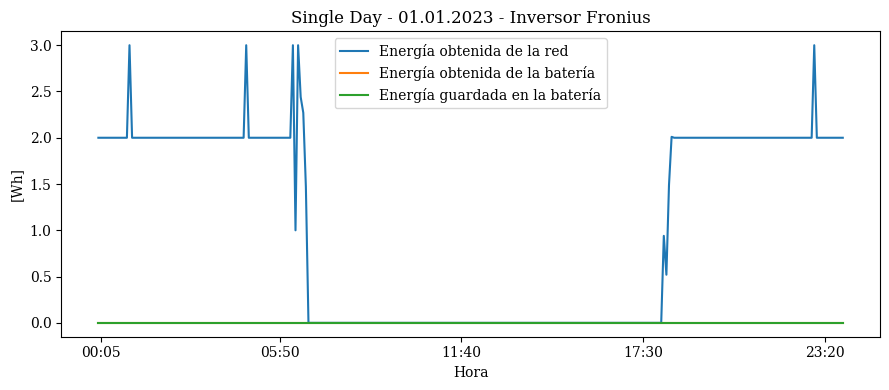

In [5]:
# grafica columna 'Energía obtenida de la red'
plt.figure(figsize=(9,4))                   # cre figura nueva y configura tamaño
plt.rcParams['font.family'] = 'serif'       # Tipo de letra
plt.title('Single Day - 01.01.2023 - Inversor Fronius') # titulo
#incluir  columna 'Energía obtenida de la red'
plt.plot(row_day['Hora'], row_day['Energía obtenida de la red'], label='Energía obtenida de la red')
#Energía obtenida de la batería
plt.plot(row_day['Hora'], row_day['Energía obtenida de la batería'], label='Energía obtenida de la batería')
#Energía guardada en la batería
plt.plot(row_day['Hora'], row_day['Energía guardada en la batería'], label='Energía guardada en la batería')


plt.ylabel('[Wh]')
plt.xlabel('Hora')                         # Etiqueta eje x
plt.legend()
plt.xticks([1,70,140,210,280])                                # leyenda
plt.tight_layout()   

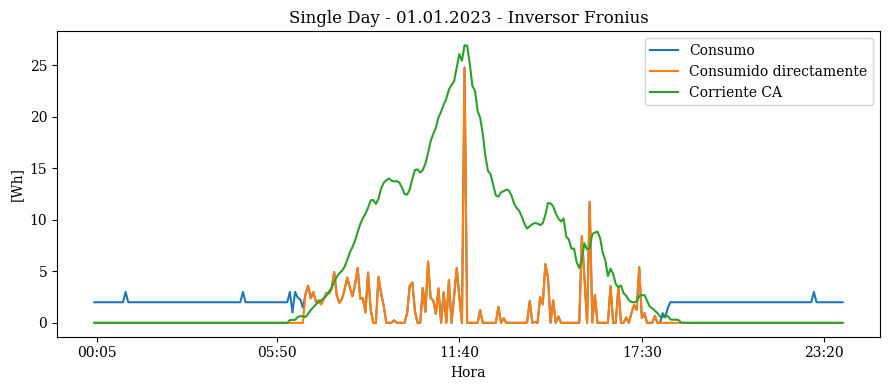

In [6]:
#Consumo
plt.figure(figsize=(9,4))                   # cre figura nueva y configura tamaño
plt.rcParams['font.family'] = 'serif'       # Tipo de letra
plt.title('Single Day - 01.01.2023 - Inversor Fronius') # titulo
#incluir  columna 'Consumo'
plt.plot(row_day['Hora'], row_day['Consumo'], label='Consumo')
#Consumo de la red
plt.plot(row_day['Hora'], row_day['Consumido directamente'], label='Consumido directamente')

#Corriente CA L1 | FRONIUS Symo 15.0-3 208 (1)
plt.plot(row_day['Hora'], row_day['Corriente CA L1 | FRONIUS Symo 15.0-3 208 (1)'], label='Corriente CA')

plt.ylabel('[Wh]')
plt.xlabel('Hora')                         # Etiqueta eje x
plt.legend()
plt.xticks([1,70,140,210,280])                                # leyenda
plt.tight_layout()



## General Plots

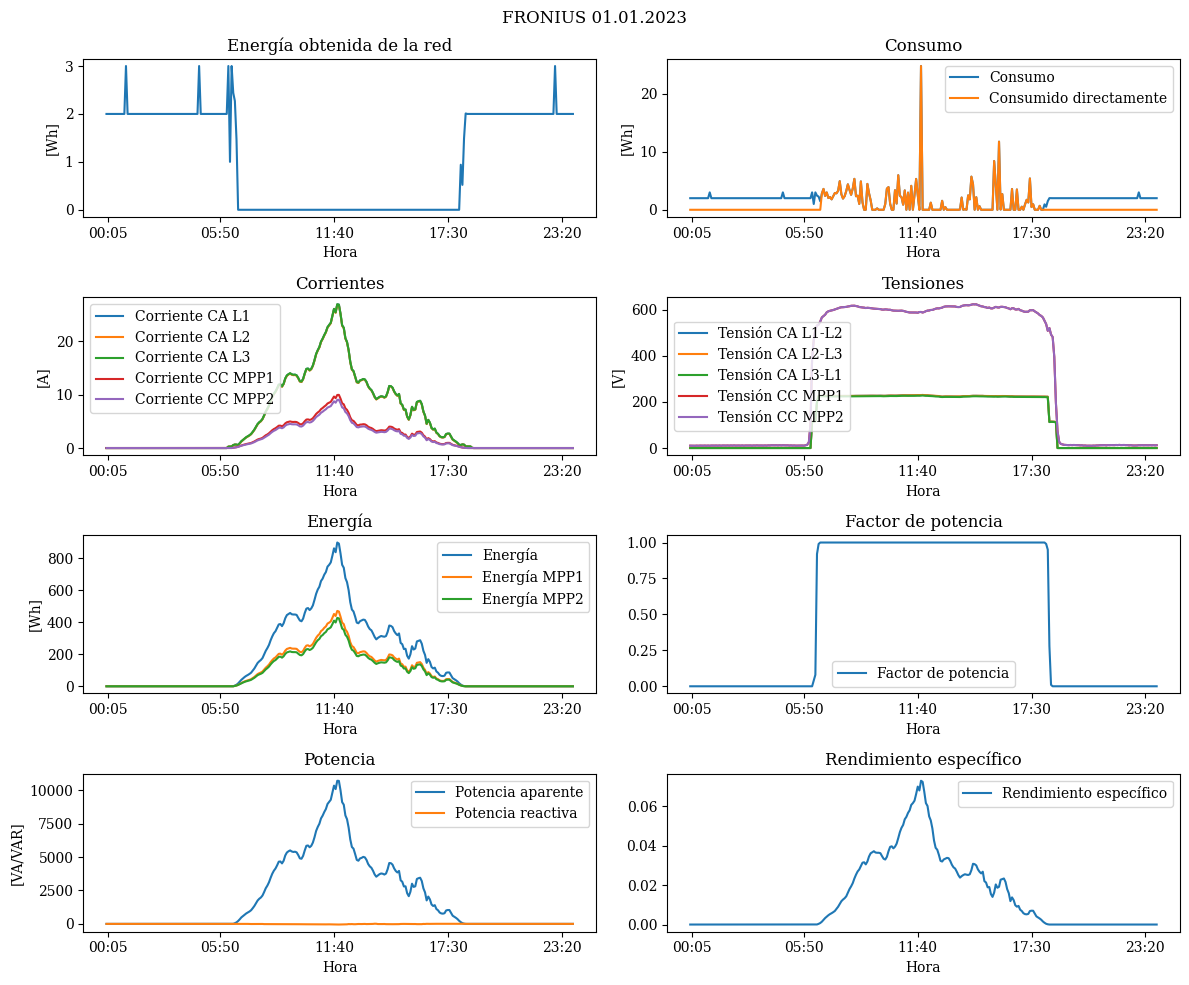

In [7]:
# multiplots 
fig, axs = plt.subplots(4, 2, figsize=(12, 10))

fig.suptitle('FRONIUS 01.01.2023')

#  grafica columna 'Energía obtenida de la red'
axs[0, 0].plot(row_day['Hora'], row_day['Energía obtenida de la red'], label='Energía obtenida de la red')
axs[0, 0].set_title('Energía obtenida de la red')
axs[0, 0].set_ylabel('[Wh]')
axs[0, 0].set_xlabel('Hora')                         # Etiqueta eje x
# axs[0, 0].legend()
axs[0, 0].set_xticks([1,70,140,210,280])     

#  grafica columna 'Consumo'
axs[0, 1].plot(row_day['Hora'], row_day['Consumo'], label='Consumo')
#incluir columna 'Consumido directamente'
axs[0, 1].plot(row_day['Hora'], row_day['Consumido directamente'], label='Consumido directamente')
axs[0, 1].set_title('Consumo')
axs[0, 1].set_ylabel('[Wh]')
axs[0, 1].set_xlabel('Hora')                         # Etiqueta eje x
axs[0, 1].legend()
axs[0, 1].set_xticks([1,70,140,210,280])



#  grafica columna 'Corriente CA L1 | FRONIUS Symo 15.0-3 208 (1)'
axs[1, 0].plot(row_day['Hora'], row_day['Corriente CA L1 | FRONIUS Symo 15.0-3 208 (1)'], label='Corriente CA L1')
#incluir columna 'Corriente CA L2 | FRONIUS Symo 15.0-3 208 (1)'
axs[1, 0].plot(row_day['Hora'], row_day['Corriente CA L2 | FRONIUS Symo 15.0-3 208 (1)'], label='Corriente CA L2')
#incluir columna 'Corriente CA L3 | FRONIUS Symo 15.0-3 208 (1)'
axs[1, 0].plot(row_day['Hora'], row_day['Corriente CA L3 | FRONIUS Symo 15.0-3 208 (1)'], label='Corriente CA L3')
#incluir columna 'Corriente CC MPP1 | FRONIUS Symo 15.0-3 208 (1)'
axs[1, 0].plot(row_day['Hora'], row_day['Corriente CC MPP1 | FRONIUS Symo 15.0-3 208 (1)'], label='Corriente CC MPP1')
#incluir columna 'Corriente CC MPP2 | FRONIUS Symo 15.0-3 208 (1)'
axs[1, 0].plot(row_day['Hora'], row_day['Corriente CC MPP2 | FRONIUS Symo 15.0-3 208 (1)'], label='Corriente CC MPP2')
axs[1, 0].set_title('Corrientes')
axs[1, 0].set_ylabel('[A]')
axs[1, 0].set_xlabel('Hora')                         # Etiqueta eje x
axs[1, 0].legend()
axs[1, 0].set_xticks([1,70,140,210,280])


#  grafica columna 'Tensión CA L1-L2 | FRONIUS Symo 15.0-3 208 (1)'
axs[1, 1].plot(row_day['Hora'], row_day['Tensión CA L1-L2 | FRONIUS Symo 15.0-3 208 (1)'], label='Tensión CA L1-L2')
#incluir columna 'Tensión CA L2-L3 | FRONIUS Symo 15.0-3 208 (1)'
axs[1, 1].plot(row_day['Hora'], row_day['Tensión CA L2-L3 | FRONIUS Symo 15.0-3 208 (1)'], label='Tensión CA L2-L3')
#incluir columna 'Tensión CA L3-L1 | FRONIUS Symo 15.0-3 208 (1)'
axs[1, 1].plot(row_day['Hora'], row_day['Tensión CA L3-L1 | FRONIUS Symo 15.0-3 208 (1)'], label='Tensión CA L3-L1')
#incluir columna 'Tensión CC MPP1 | FRONIUS Symo 15.0-3 208 (1)'
axs[1, 1].plot(row_day['Hora'], row_day['Tensión CC MPP1 | FRONIUS Symo 15.0-3 208 (1)'], label='Tensión CC MPP1')
#incluir columna 'Tensión CC MPP2 | FRONIUS Symo 15.0-3 208 (1)'
axs[1, 1].plot(row_day['Hora'], row_day['Tensión CC MPP2 | FRONIUS Symo 15.0-3 208 (1)'], label='Tensión CC MPP2')
axs[1, 1].set_title('Tensiones')
axs[1, 1].set_ylabel('[V]')
axs[1, 1].set_xlabel('Hora')                         # Etiqueta eje x
axs[1, 1].legend()
axs[1, 1].set_xticks([1,70,140,210,280])




#  grafica columna 'Energía | FRONIUS Symo 15.0-3 208 (1)'
axs[2, 0].plot(row_day['Hora'], row_day['Energía | FRONIUS Symo 15.0-3 208 (1)'], label='Energía')
#incluir columna 'Energía MPP1 | FRONIUS Symo 15.0-3 208 (1)' 
axs[2, 0].plot(row_day['Hora'], row_day['Energía MPP1 | FRONIUS Symo 15.0-3 208 (1)'], label='Energía MPP1')
#incluir columna 'Energía MPP2 | FRONIUS Symo 15.0-3 208 (1)'
axs[2, 0].plot(row_day['Hora'], row_day['Energía MPP2 | FRONIUS Symo 15.0-3 208 (1)'], label='Energía MPP2')
axs[2, 0].set_title('Energía')
axs[2, 0].set_ylabel('[Wh]')
axs[2, 0].set_xlabel('Hora')                         # Etiqueta eje x
axs[2, 0].legend()
axs[2, 0].set_xticks([1,70,140,210,280])


#  grafica columna 'Factor de potencia | FRONIUS Symo 15.0-3 208 (1)'
axs[2, 1].plot(row_day['Hora'], row_day['Factor de potencia | FRONIUS Symo 15.0-3 208 (1)'], label='Factor de potencia')
axs[2, 1].set_title('Factor de potencia')
# axs[2, 1].set_ylabel('[Wh]')
axs[2, 1].set_xlabel('Hora')                         # Etiqueta eje x
axs[2, 1].legend()
axs[2, 1].set_xticks([1,70,140,210,280])


#  grafica columna 'Potencia aparente | FRONIUS Symo 15.0-3 208 (1)'
axs[3, 0].plot(row_day['Hora'], row_day['Potencia aparente | FRONIUS Symo 15.0-3 208 (1)'], label='Potencia aparente')
#incluir columna 'Potencia reactiva | FRONIUS Symo 15.0-3 208 (1)'
axs[3, 0].plot(row_day['Hora'], row_day['Potencia reactiva | FRONIUS Symo 15.0-3 208 (1)'], label='Potencia reactiva')
axs[3, 0].set_title('Potencia')
axs[3, 0].set_ylabel('[VA/VAR]')
axs[3, 0].set_xlabel('Hora')                         # Etiqueta eje x
axs[3, 0].legend()
axs[3, 0].set_xticks([1,70,140,210,280])



#  grafica columna 'Rendimiento específico | FRONIUS Symo 15.0-3 208 (1)'
axs[3, 1].plot(row_day['Hora'], row_day['Rendimiento específico | FRONIUS Symo 15.0-3 208 (1)'], label='Rendimiento específico')
axs[3, 1].set_title('Rendimiento específico')
# axs[3, 1].set_ylabel('[Wh]')
axs[3, 1].set_xlabel('Hora')                         # Etiqueta eje x
axs[3, 1].legend()
axs[3, 1].set_xticks([1,70,140,210,280])


# Ajustar el espacio entre los subplots
plt.legend()
plt.tight_layout()
plt.show()

## Average of single-day

In [8]:
# Eliminar las filas de 'row_day' que tienen 0 en la columna 'GHI'
row_day = row_day.loc[row_day['Producción fotovoltaica'] != 0]
print(row_day.shape)

# Calcular el promedio de los valores en la columna 'Producción fotovoltaica'
avg = row_day['Producción fotovoltaica'].mean()
print('Promedio Producción fotovoltaica:',avg)



(144, 26)
Promedio Producción fotovoltaica: 325.61069444444445


## New df with month information

In [14]:
# print(df.head())
# print(df.shape)

# Extraer el mes de la columna 'Fecha'
df['Mes'] = df['Fecha'].str.split('.').str.get(1)

unique_month = df['Mes'].unique()
# print(unique_month)

df.head(5) 


,Corriente CA L1 | FRONIUS Symo 15.0-3 208 (1),Corriente CA L2 | FRONIUS Symo 15.0-3 208 (1),Corriente CA L3 | FRONIUS Symo 15.0-3 208 (1),Corriente CC MPP1 | FRONIUS Symo 15.0-3 208 (1),Corriente CC MPP2 | FRONIUS Symo 15.0-3 208 (1),Energía | FRONIUS Symo 15.0-3 208 (1),Energía MPP1 | FRONIUS Symo 15.0-3 208 (1),Energía MPP2 | FRONIUS Symo 15.0-3 208 (1),Factor de potencia | FRONIUS Symo 15.0-3 208 (1),Potencia aparente | FRONIUS Symo 15.0-3 208 (1),...,Consumido directamente,Consumo,Energía guardada en la batería,Energía obtenida de la batería,Energía obtenida de la red,Energía suministrada a la red,Producción fotovoltaica,Hora,Fecha,Mes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,00:00,01.01.2023,01
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,00:05,01.01.2023,01
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,00:10,01.01.2023,01
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,00:15,01.01.2023,01
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,00:20,01.01.2023,01


## Group df for single Month

In [15]:
# Buscar en la columna "Mes" las filas con el valor "01"
row_month = df.loc[df['Mes'] == '01']
print(row_month.shape)

(8928, 27)


## Graphs of single-Month


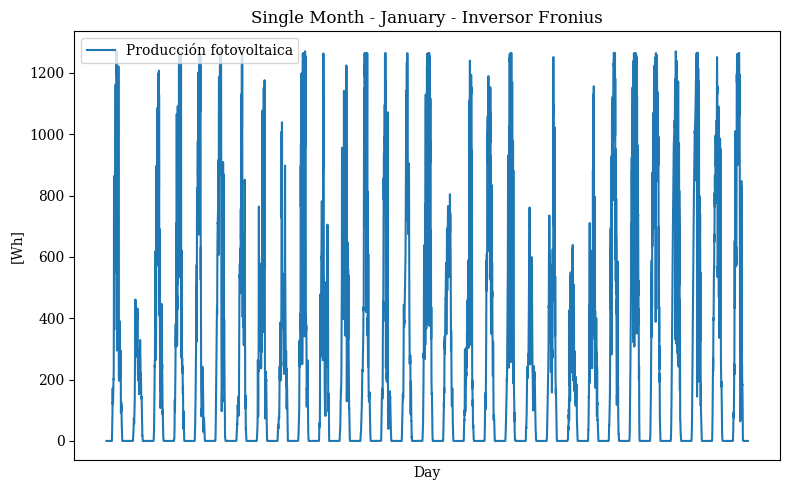

In [17]:
# Crear una figura 
plt.figure(figsize=(8,5))                   # cre figura nueva y configura tamaño
plt.rcParams['font.family'] = 'serif'       # Tipo de letra
plt.plot(row_month['Producción fotovoltaica'], label='Producción fotovoltaica')
plt.title('Single Month - January - Inversor Fronius') # titulo
plt.ylabel('[Wh]')
plt.xlabel('Day')                         # Etiqueta eje x
plt.legend()
plt.xticks([])                                # leyenda
plt.tight_layout()

## Scatter Plot by Mont

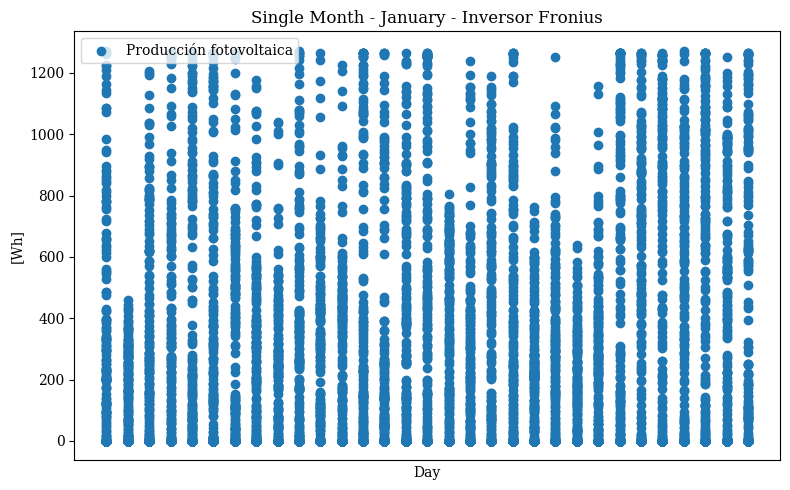

In [20]:
# scatter plot 
plt.figure(figsize=(8,5))                   # cre figura nueva y configura tamaño
plt.rcParams['font.family'] = 'serif'       # Tipo de letra
plt.scatter(row_month['Fecha'], row_month['Producción fotovoltaica'], label='Producción fotovoltaica')
# plt.plot(row_month['Producción fotovoltaica'], label='Producción fotovoltaica')
plt.title('Single Month - January - Inversor Fronius') # titulo
plt.ylabel('[Wh]')
plt.xlabel('Day')                         # Etiqueta eje x
plt.legend()
plt.xticks([])                                # leyenda
plt.tight_layout()


## New df with avg day information

In [21]:
# Encontrar el promedio de 'Producción fotovoltaica' para todos los días de cada mes
avg_day = df.groupby('Fecha')['Producción fotovoltaica'].mean()
print(avg_day)
print(avg_day.shape)

Fecha
01.01.2023    212.111493
01.02.2023    192.674097
01.03.2023    123.977361
01.04.2023    178.395104
01.05.2023    232.783854
                 ...    
30.05.2023    197.264826
30.06.2023    264.983819
31.01.2023    285.942222
31.03.2023    140.141562
31.05.2023    160.861493
Name: Producción fotovoltaica, Length: 181, dtype: float64
(181,)


## Graph avg Day by mont

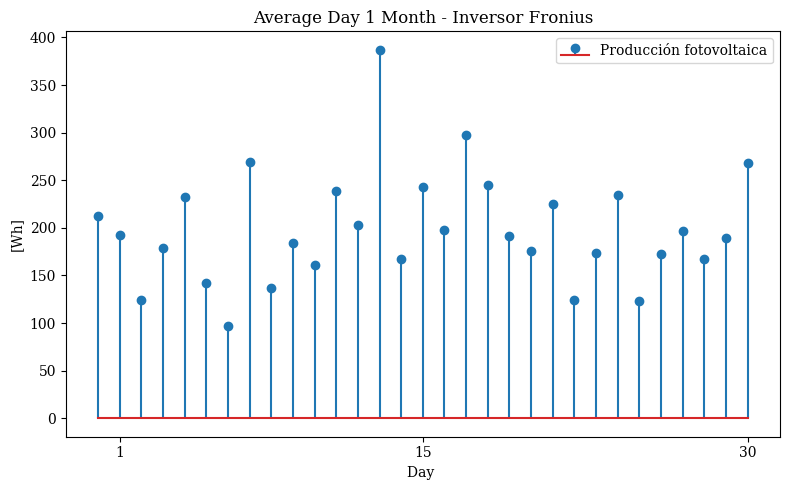

In [14]:
# Crear una figura stem de avg_day solamente para el primer mes
plt.figure(figsize=(8,5))                   # cre figura nueva y configura tamaño
plt.rcParams['font.family'] = 'serif'       # Tipo de letra
plt.stem(avg_day[0:31], label='Producción fotovoltaica')
plt.title('Average Day 1 Month - Inversor Fronius') # titulo
plt.ylabel('[Wh]')
plt.xlabel('Day ')                         # Etiqueta eje x
plt.legend()
plt.xticks([1,15,30])                                # leyenda
plt.tight_layout()


## Graph avg Day by Year

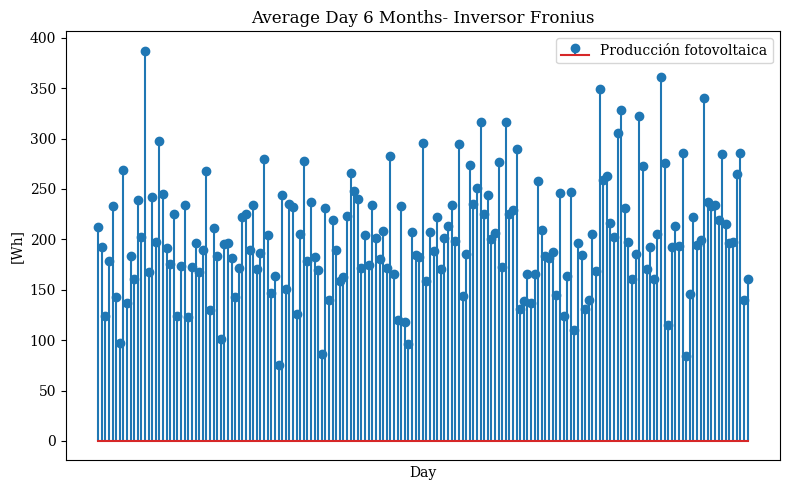

In [15]:
# Crear una figura de avg_day en cada fecha
plt.figure(figsize=(8,5))                   # cre figura nueva y configura tamaño
plt.rcParams['font.family'] = 'serif'       # Tipo de letra
plt.stem(avg_day, label='Producción fotovoltaica')
plt.title('Average Day 6 Months- Inversor Fronius') # titulo
plt.ylabel('[Wh]')
plt.xlabel('Day')                         # Etiqueta eje x
plt.legend()
plt.xticks([])                                # leyenda
plt.tight_layout()

## New df with avg month information

In [16]:
# Encontrar el promedio de 'Producción fotovoltaica' para cada mes
avg_month = df.groupby('Mes')['Producción fotovoltaica'].mean()
print(avg_month)


Mes
01    225.426743
02    204.140295
03    183.170354
04    207.180759
05    192.793171
06    207.849641
Name: Producción fotovoltaica, dtype: float64


## Graph by Month

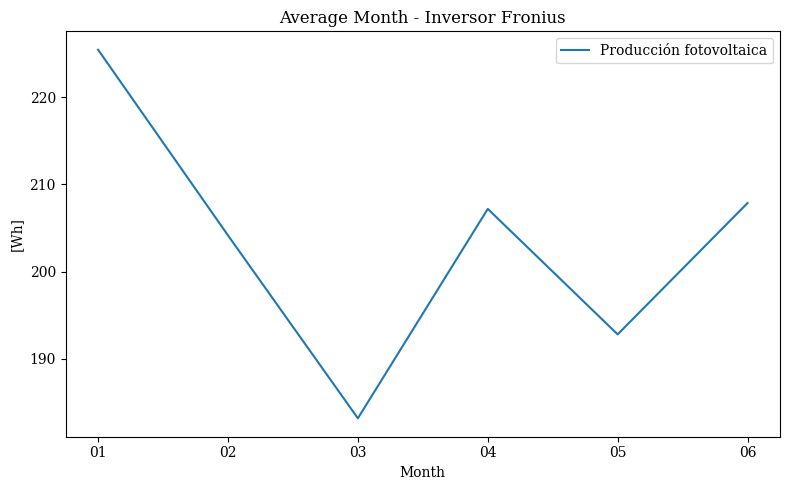

In [17]:
# Crear una figura
plt.figure(figsize=(8,5))                   # cre figura nueva y configura tamaño
plt.rcParams['font.family'] = 'serif'       # Tipo de letra
plt.plot(avg_month, label='Producción fotovoltaica')

# #incluir grafima stem
# plt.stem(avg_month, label='Producción fotovoltaica')



plt.title('Average Month - Inversor Fronius') # titulo
plt.ylabel('[Wh]')
plt.xlabel('Month')                         # Etiqueta eje x
plt.legend()
# plt.xticks([])                                # leyenda
plt.tight_layout()
